<a href="https://colab.research.google.com/github/yeesem/Soft-Computing/blob/main/Tutorial_9_Genetic_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
# Define fitness function
# Set the fitness function based on the goal
def fitness_function(x):
  A = 10
  score = A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])
  return score

In [ ]:
# Create generic algorithm

# Initialize the population
def initialize_population(pop_size,dimension,bounds):
  return [np.random.uniform(bounds[0],bounds[1],dimension) for _ in range(pop_size)]

# Selection using tournament selection
def tournament_selection(population,fitnesses,k=3):
  selected = random.sample(range(len(population)),k)
  selected_fitness = [fitnesses[i] for i in selected]
  return population[selected[selected_fitness.index(min(selected_fitness))]]

# Single-point crossover
def crossover(parent1,parent2,crossover = 0.7):
  if random.random() < crossover:
    point = random.randint(1,len(parent1) - 1)
    child1 = np.concatenate([parent1[:point],parent2[point:]])
    child2 = np.concatenate([parent2[:point],parent1[point:]])
    return child1,child2

  return parent1,parent2

# Gaussian mutation
def mutate(individual,mutation_rate = 0.01,bounds = (-5.12,5.12)):
  for i in range(len(individual)):
    if random.random() < mutation_rate:
      individual[i] = individual[i] + np.random.normal(0,1)
      individual[i] = np.clip(individual[i],bounds[0],bounds[1])
  return individual

In [ ]:
def roulette_wheel_selection(population,fitnesses):
  total_fitness = sum(fitnesses)
  selection_probs = [f / total_fitness for f in fitnesses]
  return population[np.random.choice(len(population),p = selection_probs)]

In [ ]:
# Design the genetic algoritms flow

def genetic_algorithm(pop_size,dimension,bounds,generations,crossover_rate,mutation_rate,selection = 'tournament'):
  # Initialize population
  population = initialize_population(pop_size,dimension,bounds)

  # Store the fitness history
  fitness_history = []

  for generation in range(generations):
     # Evaluate fitnesses
     fitnesses = [fitness_function(ind) for ind in population]

     # Kepp tract of best fitness
     best_fitness = min(fitnesses)
     fitness_history.append(best_fitness)

     # Create a new population
     new_population = []

     while len(new_population) < pop_size:
        if selection == 'tournament':
            parent1 = tournament_selection(population,fitnesses)
            parent2 = tournament_selection(population,fitnesses)
        elif selection == 'roulette':
            parent1 = roulette_wheel_selection(population,fitnesses)
            parent2 = roulette_wheel_selection(population,fitnesses)
        else:
            print("Invalid Selection command")
            break
        child1,child2 = crossover(parent1,parent2,crossover_rate)
        child1 = mutate(child1,mutation_rate,bounds)
        child2 = mutate(child2,mutation_rate,bounds)
        new_population.extend([child1,child2])

     population = new_population[:pop_size]

  return population,fitness_history

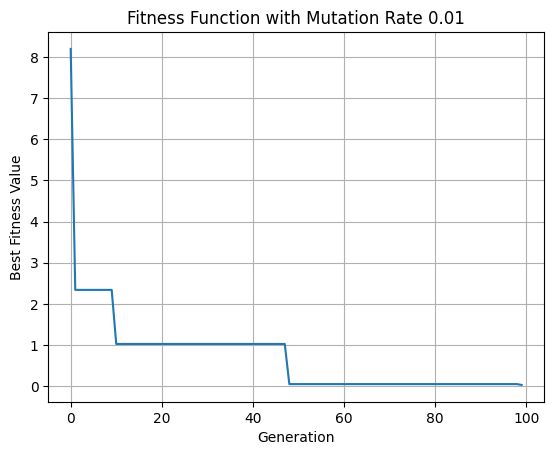

In [ ]:
# Run the genetic algorithms with parameters

# Parameters
pop_size = 100
dimension = 2
bounds = (-5.12,5.12)
generations = 100
crossover_rate = 0.7
mutation_rate = 0.01
selection = 'tournament'

# Run the genetic algorithm
final_population,fitness_history = genetic_algorithm(pop_size,dimension,bounds,generations,crossover_rate,mutation_rate,selection)

# Plot the convergence
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Value")
plt.title("Fitness Function with Mutation Rate {:.2f}".format(mutation_rate))
plt.grid()
plt.show()

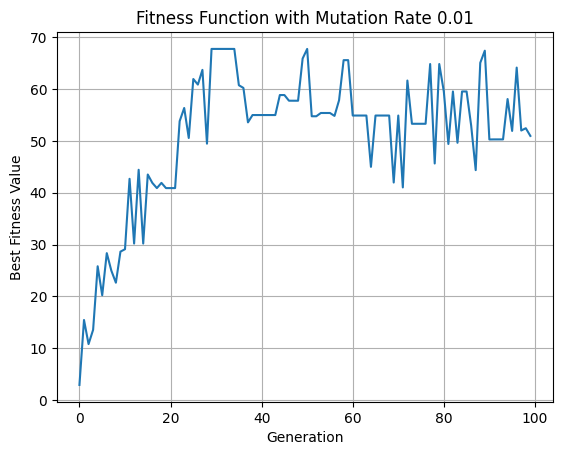

In [ ]:
# Run the genetic algorithms with parameters

# Parameters
pop_size = 100
dimension = 2
bounds = (-5.12,5.12)
generations = 100
crossover_rate = 0.7
mutation_rate = 0.01
selection = 'roulette'

# Run the genetic algorithm
final_population,fitness_history = genetic_algorithm(pop_size,dimension,bounds,generations,crossover_rate,mutation_rate,selection)

# Plot the convergence
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Value")
plt.title("Fitness Function with Mutation Rate {:.2f}".format(mutation_rate))
plt.grid()
plt.show()

Parameter  1  -  [100, 2, (-5.12, 5.12), 100, 0.7, 0.005, 'tournament']
------------------------------------------------------------------------


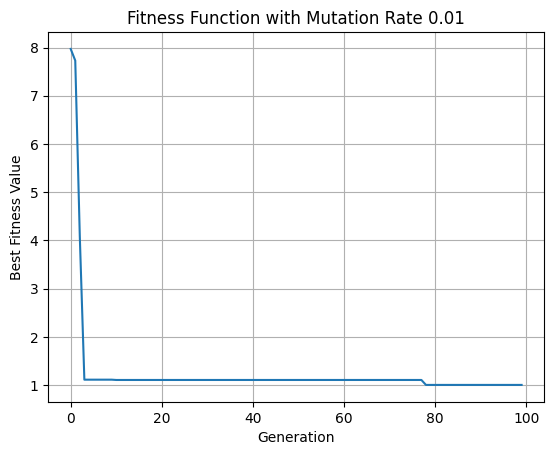



Parameter  2  -  [100, 2, (-5.12, 5.12), 100, 0.7, 0.01, 'tournament']
------------------------------------------------------------------------


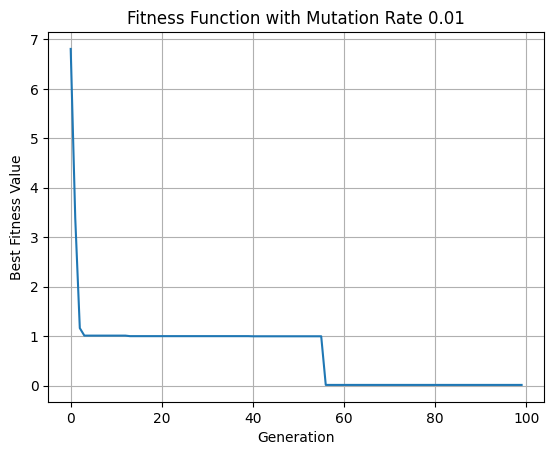



Parameter  3  -  [100, 2, (-5.12, 5.12), 100, 0.6, 0.05, 'tournament']
------------------------------------------------------------------------


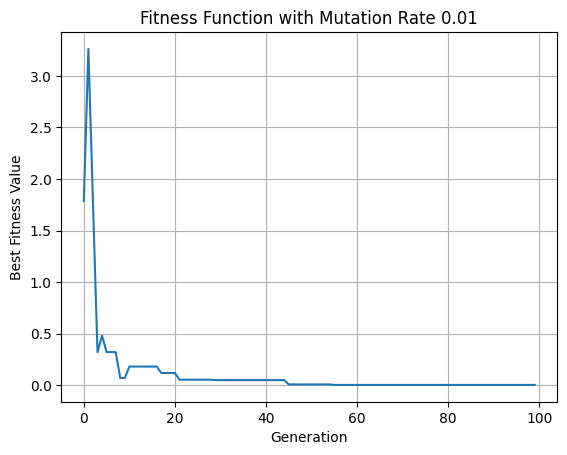



Parameter  4  -  [100, 2, (-5.12, 5.12), 100, 0.5, 0.1, 'tournament']
------------------------------------------------------------------------


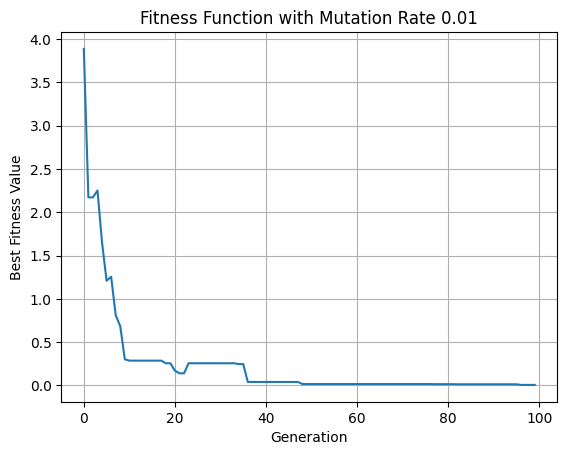



Parameter  5  -  [100, 2, (-5.12, 5.12), 100, 0.7, 0.01, 'roulette']
------------------------------------------------------------------------


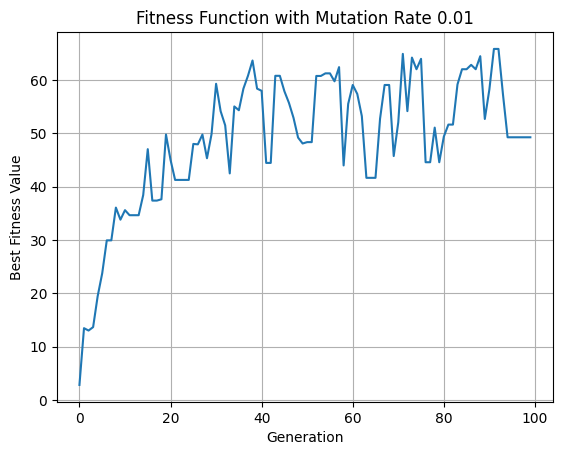



Parameter  6  -  [100, 2, (-5.12, 5.12), 100, 0.6, 0.05, 'roulette']
------------------------------------------------------------------------


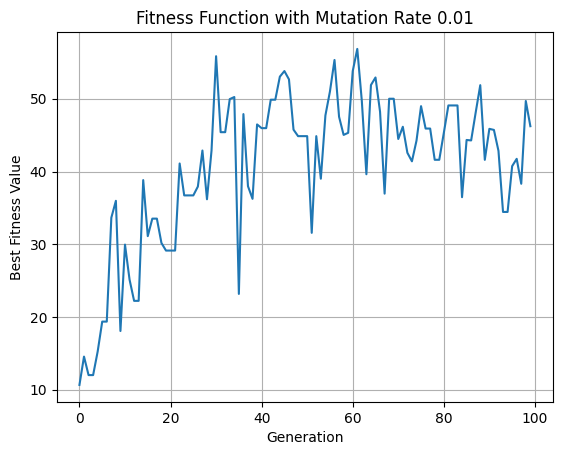



Parameter  7  -  [100, 2, (-5.12, 5.12), 100, 0.5, 0.1, 'roulette']
------------------------------------------------------------------------


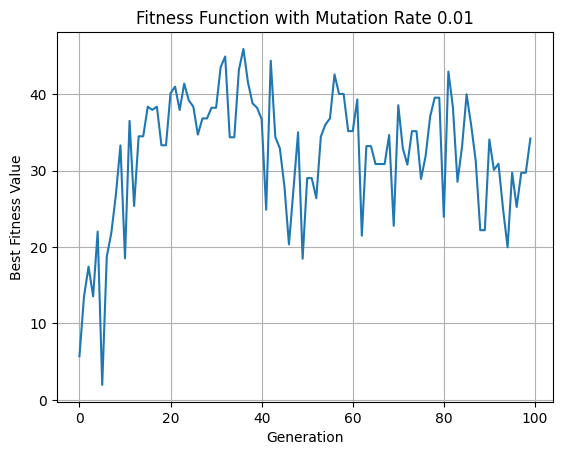

In [ ]:
# Parameters
# - pop_size
# - dimension
# - bounds
# - generations
# - crossover_rate
# - mutation_rate
# - selection

parameters = [
    [100,2,(-5.12,5.12),100,0.7,0.005,'tournament'],
    [100,2,(-5.12,5.12),100,0.7,0.01,'tournament'],
    [100,2,(-5.12,5.12),100,0.6,0.05,'tournament'],
    [100,2,(-5.12,5.12),100,0.5,0.10,'tournament'],

    [100,2,(-5.12,5.12),100,0.7,0.01,'roulette'],
    [100,2,(-5.12,5.12),100,0.6,0.05,'roulette'],
    [100,2,(-5.12,5.12),100,0.5,0.10,'roulette']
]

def run_genetic_algorithm(parameters):
  for index,para in enumerate(parameters):
      print("Parameter " , index + 1, " - ", para)
      print("------------------------------------------------------------------------")

      # Run the genetic algorithm
      final_population,fitness_history = genetic_algorithm(para[0],para[1],para[2],para[3],para[4],para[5],para[6])

      # Plot the convergence
      plt.plot(fitness_history)
      plt.xlabel("Generation")
      plt.ylabel("Best Fitness Value")
      plt.title("Fitness Function with Mutation Rate {:.2f}".format(mutation_rate))
      plt.grid()
      plt.show()

      print("\n")

run_genetic_algorithm(parameters)

In [ ]:
# Modified genetic algorithm
# Add stopping criteria
# Modify crossover_rate and mutation_rate every loop

def modified_genetic_algorithm(pop_size,dimension,bounds,generations,crossover_rate,mutation_rate,selection = 'tournament'):
  # Initialize population
  population = initialize_population(pop_size,dimension,bounds)

  # Store the fitness history
  fitness_history = []

  max_count = 50

  best_fitness = float('inf')
  count_num_gen = 0

  for generation in range(generations):
     # Evaluate fitnesses
     fitnesses = [fitness_function(ind) for ind in population]

     # Kepp tract of best fitness
     if min(fitnesses) >= best_fitness:
        count_num_gen += 1
     elif min(fitnesses) < best_fitness:
        count_num_gen = 0
        best_fitness = min(fitnesses)

     best_fitness = min(fitnesses)
     fitness_history.append(best_fitness)

     # Create a new population
     new_population = []

     while len(new_population) < pop_size:
        if selection == 'tournament':
            parent1 = tournament_selection(population,fitnesses)
            parent2 = tournament_selection(population,fitnesses)
        elif selection == 'roulette':
            parent1 = roulette_wheel_selection(population,fitnesses)
            parent2 = roulette_wheel_selection(population,fitnesses)
        else:
            print("Invalid Selection command")
            break
        child1,child2 = crossover(parent1,parent2,crossover_rate)
        child1 = mutate(child1,mutation_rate,bounds)
        child2 = mutate(child2,mutation_rate,bounds)
        new_population.extend([child1,child2])

     population = new_population[:pop_size]

     # Modify crossover_rate and mutation_rate every generation loop
     crossover_rate *= 1.05
     mutation_rate *= 0.99

     if best_fitness <= 0.05:
       print("Triggered Stopping Criteria, fitness : ",best_fitness)
       break

     # Stopping criteria if no new results found after X generations
     if count_num_gen > max_count:
       break

  return population,fitness_history

Parameter  1  -  [100, 2, (-5.12, 5.12), 100, 0.7, 0.005, 'tournament']
------------------------------------------------------------------------


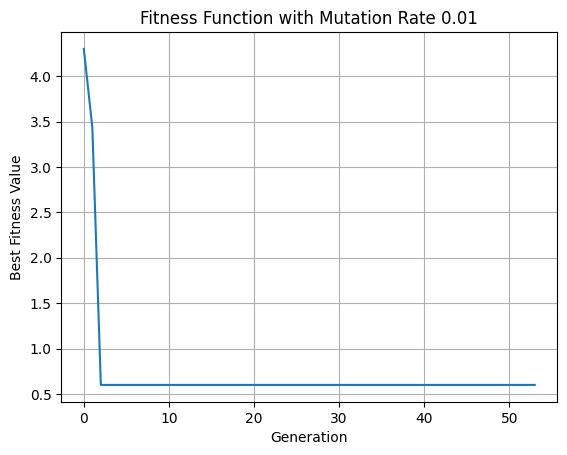



Parameter  2  -  [100, 2, (-5.12, 5.12), 100, 0.7, 0.01, 'tournament']
------------------------------------------------------------------------
Triggered Stopping Criteria, fitness :  0.02709812855812288


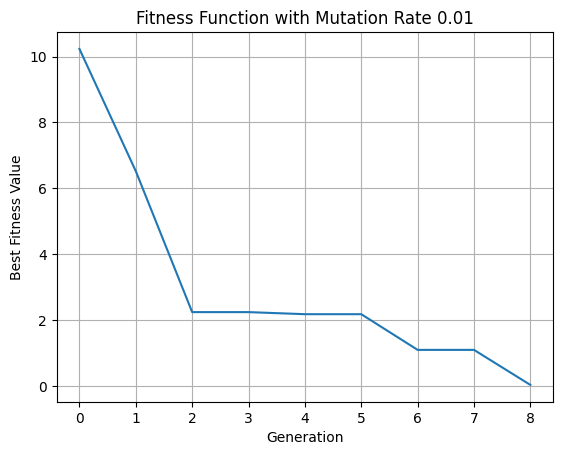



Parameter  3  -  [100, 2, (-5.12, 5.12), 100, 0.6, 0.05, 'tournament']
------------------------------------------------------------------------
Triggered Stopping Criteria, fitness :  0.026114284416735245


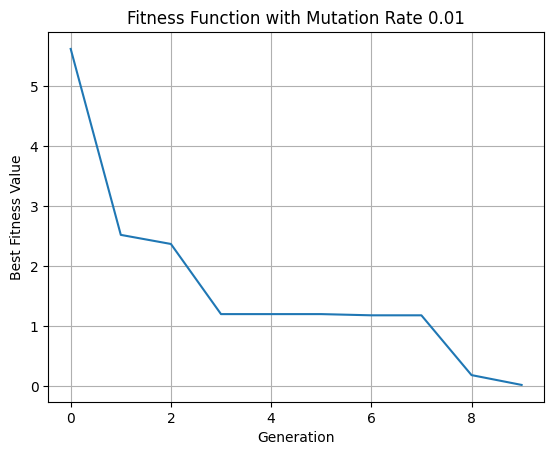



Parameter  4  -  [100, 2, (-5.12, 5.12), 100, 0.5, 0.1, 'tournament']
------------------------------------------------------------------------
Triggered Stopping Criteria, fitness :  0.04526432181027218


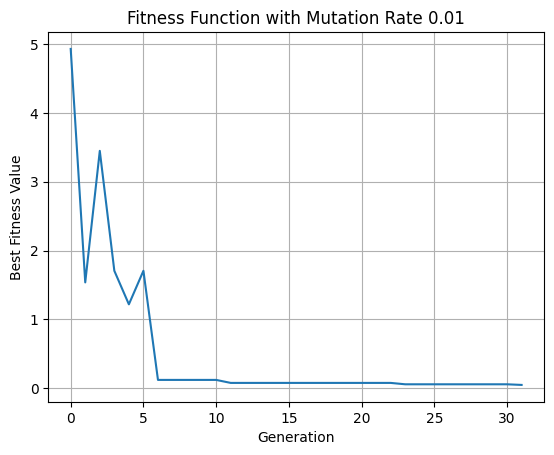



Parameter  5  -  [100, 2, (-5.12, 5.12), 100, 0.7, 0.01, 'roulette']
------------------------------------------------------------------------


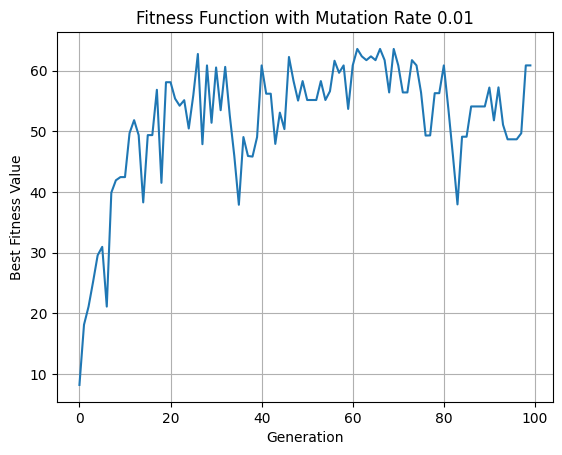



Parameter  6  -  [100, 2, (-5.12, 5.12), 100, 0.6, 0.05, 'roulette']
------------------------------------------------------------------------


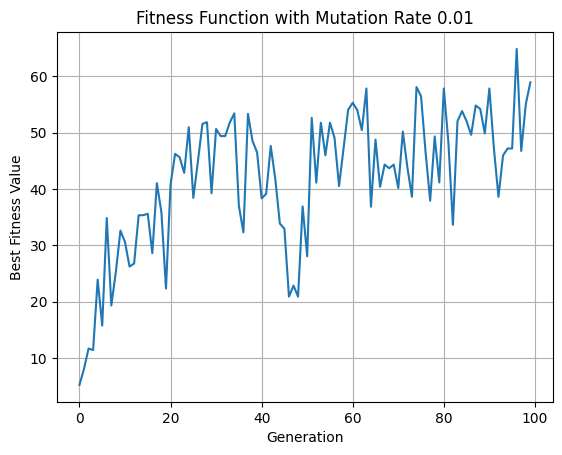



Parameter  7  -  [100, 2, (-5.12, 5.12), 100, 0.5, 0.1, 'roulette']
------------------------------------------------------------------------


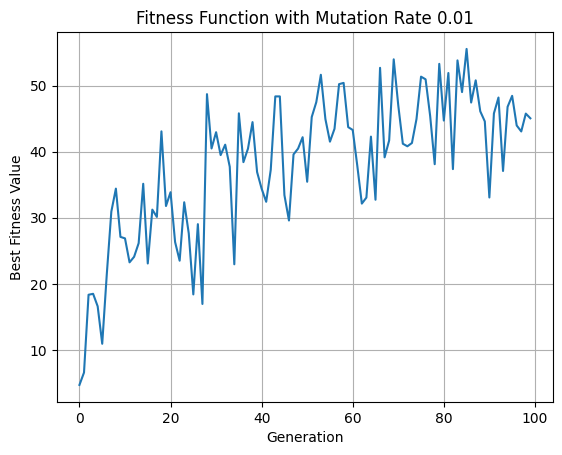

In [ ]:
parameters = [
    [100,2,(-5.12,5.12),100,0.7,0.005,'tournament'],
    [100,2,(-5.12,5.12),100,0.7,0.01,'tournament'],
    [100,2,(-5.12,5.12),100,0.6,0.05,'tournament'],
    [100,2,(-5.12,5.12),100,0.5,0.10,'tournament'],

    [100,2,(-5.12,5.12),100,0.7,0.01,'roulette'],
    [100,2,(-5.12,5.12),100,0.6,0.05,'roulette'],
    [100,2,(-5.12,5.12),100,0.5,0.10,'roulette']
]

def run_genetic_algorithm(parameters):
  for index,para in enumerate(parameters):
      print("Parameter " , index + 1, " - ", para)
      print("------------------------------------------------------------------------")

      # Run the genetic algorithm
      final_population,fitness_history = modified_genetic_algorithm(para[0],para[1],para[2],para[3],para[4],para[5],para[6])

      # Plot the convergence
      plt.plot(fitness_history)
      plt.xlabel("Generation")
      plt.ylabel("Best Fitness Value")
      plt.title("Fitness Function with Mutation Rate {:.2f}".format(mutation_rate))
      plt.grid()
      plt.show()

      print("\n")

run_genetic_algorithm(parameters)